<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [3]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [4]:
# Read CSV
house_csv = "../../data/Sacramento_transactions.csv"

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [5]:
# ANSWER
house =pd.read_csv(house_csv)
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### 2.2 List all possible variables which might be Predictor variable.

In [6]:
# ANSWER
price_var = house[['beds', 'baths', 'sq__ft', 'latitude', 'longitude']]
price_var

,beds,baths,sq__ft,latitude,longitude
0,2,1,836,38.631913,-121.434879
1,3,1,1167,38.478902,-121.431028
2,2,1,796,38.618305,-121.443839
3,2,1,852,38.616835,-121.439146
4,2,1,797,38.519470,-121.435768
...,...,...,...,...,...
980,4,3,2280,38.457679,-121.359620
981,3,2,1477,38.499893,-121.458890
982,3,2,1216,38.708824,-121.256803
983,4,2,1685,38.417000,-121.397424


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [7]:
# ANSWER
price_var.corr()
# beds and baths is the best predictor cause the correlation is 84%. 
# It also makes sense when you have more beds, baths number will increase too. 

,beds,baths,sq__ft,latitude,longitude
beds,1.000000,0.839650,0.684041,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,-0.383274,-0.177742
latitude,-0.291307,-0.235792,-0.383274,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [8]:
# ANSWER 
price_mean = house['price'].mean()
price_mean

234144.26395939087

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [9]:
# ANSWER
residuals_sim = abs(house['price'] - price_mean)
residuals_sim

0      174922.263959
1      165932.263959
2      165264.263959
3      164837.263959
4      152244.263959
           ...      
980      1719.263959
981       144.263959
982       855.736041
983      1156.736041
984      1593.736041
Name: price, Length: 985, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [10]:
# ANSWER
X = house['sq__ft']
Y = house['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [23]:
# ANSWER
x_mean = np.mean(X)
y_mean = np.mean(Y)
numerator = np.sum((Y-y_mean)*(X-x_mean))
denominator = np.sum((X - x_mean)**2)
beta_1 = numerator/denominator
beta_1


54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [24]:
# ANSWER
beta_0 = y_mean - beta_1*x_mean
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [26]:
# ANSWER
y_hat = beta_0 + beta_1*X
y_hat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [29]:
# ANSWER
residual = Y-y_hat
residual

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [31]:
# ANSWER
def r_square_value(y, y_hat):
    y_mean = np.mean(y)
    numerator = np.sum((y - y_hat)**2)
    denominator = np.sum((y - y_mean)**2)
    r_square = 1 - numerator/denominator
    return r_square
r_square_value(Y, y_hat)

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

<Axes: xlabel='sq__ft'>

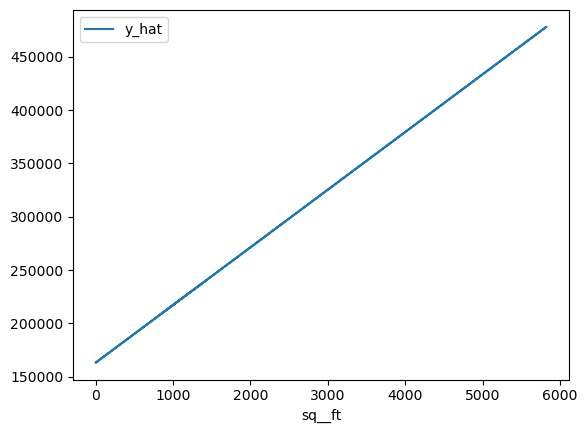

In [36]:
# ANSWER
house['y_hat'] = y_hat
house.plot('sq__ft', 'y_hat')


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [38]:
# ANSWER
predict_price = beta_0 + beta_1*1204
predict_price

228137.1635919888



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



